<a href="https://colab.research.google.com/github/Vivek-Hiremath55/AI_Systems_Pro/blob/main/VivekHiremath/Playground_VivekHiremath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initializing important libraries

In [1]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

# This one is to read hdf file
import h5py

# this is to display the images
from PIL import Image
import io
from IPython.display import display #notebook display

# Mounting Drive & Initializing Descriptive Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [50]:
train_meta_df = pd.read_csv('/content/drive/MyDrive/AIS_Pro_Data/train-metadata.csv')

<ipython-input-50-5c08f56a486a>:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_meta_df = pd.read_csv('/content/drive/MyDrive/AIS_Pro_Data/train-metadata.csv')


# Visualizing Dataframe

In [51]:
train_meta_df.head()

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


In [52]:
train_meta_df.shape

(401059, 55)

# ------------------------------------------------------------------------------------------------------------------------------------------

### Number of Features = 54
### Data Type = Varied (object, float64, int64)
### Shape = Rows -> 401059, Columns -> 55

# ------------------------------------------------------------------------------------------------------------------------------------------

# Evaluating percentage of missing vallues

In [53]:
def null_percentage(df):
    """
    Gives the percentage of missing values in a dataframe.
    Input : Dataframe
    Output : Top 10 columns with missing values
    """
    null_list = []

    # Loop through the columns of df (not train_meta_df)
    for col in df.columns:
        pct_missing = df[col].isna().sum() * 100 / len(df)
        null_list.append(pct_missing)

    # Create a DataFrame with column names and missing percentage
    null_df = pd.DataFrame({'Column': df.columns, 'Null Percentage': null_list})

    # Sort the DataFrame by missing percentage and return the top 10 columns
    null_df = null_df.sort_values(by='Null Percentage', ascending=False)

    return null_df.head(10)  # Return the top 10 columns with the highest missing values


In [54]:
# Top 10 columns with null values

null_percentage(train_meta_df)

,Column,Null Percentage
51,iddx_5,99.999751
52,mel_mitotic_index,99.986785
53,mel_thick_mm,99.984292
50,iddx_4,99.862614
49,iddx_3,99.734453
48,iddx_2,99.733705
45,lesion_id,94.500061
4,sex,2.871647
5,anatom_site_general,1.435200
3,age_approx,0.697653


# Now retireveing the images from hdf file

In [ ]:
file_path = '/content/drive/MyDrive/AIS_Pro_Data/train-image.hdf5'
hdf5_file = h5py.File(file_path, 'r')

In [ ]:
name_list = list(hdf5_file.keys()) #I'll be using this to access the images

In [ ]:
def display_image(image_data): #here im displaying the images only
    image = Image.open(io.BytesIO(image_data))
    display(image)

def image_selector(image_name): #this is to retireve the image data
    image_data = hdf5_file[image_name][()]
    display_image(image_data)

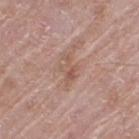

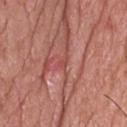

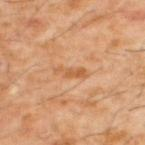

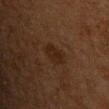

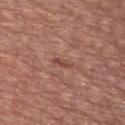

In [ ]:
#Now im displaying say first 5 images from the set

for i in range(5):
    image_selector(name_list[i])

# EDA for text data

In [8]:
df  = train_meta_df.copy()

In [9]:
null = null_percentage(df)

In [10]:
drop_list = []

for entry in null.index:
  if null['Null Percentage'][entry] > 50:
    drop_list.append(null['Column'][entry])

In [11]:
drop_list

['iddx_5',
 'mel_mitotic_index',
 'mel_thick_mm',
 'iddx_4',
 'iddx_3',
 'iddx_2',
 'lesion_id']

In [12]:
df.drop(drop_list, axis=1, inplace=True)

In [13]:
df.shape

(401059, 48)

In [14]:
null_percentage(df)

,Column,Null Percentage
4,sex,2.871647
5,anatom_site_general,1.435200
3,age_approx,0.697653
0,isic_id,0.000000
37,tbp_lv_stdLExt,0.000000
28,tbp_lv_location,0.000000
29,tbp_lv_location_simple,0.000000
30,tbp_lv_minorAxisMM,0.000000
31,tbp_lv_nevi_confidence,0.000000
32,tbp_lv_norm_border,0.000000


In [15]:
df.shape

(401059, 48)

In [16]:
df.dropna(axis = 0, inplace=True)
df.shape

(381914, 48)

In [17]:
null_percentage(df)

,Column,Null Percentage
0,isic_id,0.0
1,target,0.0
26,tbp_lv_deltaLBnorm,0.0
27,tbp_lv_eccentricity,0.0
28,tbp_lv_location,0.0
29,tbp_lv_location_simple,0.0
30,tbp_lv_minorAxisMM,0.0
31,tbp_lv_nevi_confidence,0.0
32,tbp_lv_norm_border,0.0
33,tbp_lv_norm_color,0.0


In [18]:
df.head(2)

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,attribution,copyright_license,iddx_full,iddx_1,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,0.590476,85,-182.703552,613.493652,-42.427948,Memorial Sloan Kettering Cancer Center,CC-BY,Benign,Benign,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,0.285714,55,-0.078308,1575.687000,57.174500,Memorial Sloan Kettering Cancer Center,CC-BY,Benign,Benign,3.141455


In [19]:
df.columns

Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'iddx_full', 'iddx_1',
       'tbp_lv_dnn_lesion_confidence'],
      dtype='object')

In [20]:
columns_to_keep = ['target', 'age_approx', 'sex', 'anatom_site_general',
                   'clin_size_long_diam_mm', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
                   'tbp_lv_color_std_mean', 'tbp_lv_eccentricity', 'tbp_lv_location',
                    'tbp_lv_minorAxisMM','tbp_lv_perimeterMM', 'tbp_lv_x',
                   'tbp_lv_y', 'tbp_lv_z']

In [21]:
df_2 = df[columns_to_keep]

In [22]:
df_2.head(1)

,target,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,tbp_lv_areaMM2,tbp_lv_area_perim_ratio,tbp_lv_color_std_mean,tbp_lv_eccentricity,tbp_lv_location,tbp_lv_minorAxisMM,tbp_lv_perimeterMM,tbp_lv_x,tbp_lv_y,tbp_lv_z
0,0,60.0,male,lower extremity,3.04,3.152561,27.47617,0.0,0.901302,Right Leg - Upper,1.543016,9.307003,-182.703552,613.493652,-42.427948


In [23]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler




In [24]:
df_2.drop('target', axis=1, inplace=True)

<ipython-input-24-4d94c5a42914>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.drop('target', axis=1, inplace=True)


In [ ]:
df_3 = pd.get_dummies(df_2, drop_first=True)

In [ ]:
df_3.head(1)
#df_3.drop('target', axis = 1, inplace=True)

,age_approx,clin_size_long_diam_mm,tbp_lv_areaMM2,tbp_lv_area_perim_ratio,tbp_lv_color_std_mean,tbp_lv_eccentricity,tbp_lv_minorAxisMM,tbp_lv_perimeterMM,tbp_lv_x,tbp_lv_y,...,tbp_lv_location_Right Leg,tbp_lv_location_Right Leg - Lower,tbp_lv_location_Right Leg - Upper,tbp_lv_location_Torso Back,tbp_lv_location_Torso Back Bottom Third,tbp_lv_location_Torso Back Middle Third,tbp_lv_location_Torso Back Top Third,tbp_lv_location_Torso Front,tbp_lv_location_Torso Front Bottom Half,tbp_lv_location_Torso Front Top Half
0,60.0,3.04,3.152561,27.47617,0.0,0.901302,1.543016,9.307003,-182.703552,613.493652,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_3)

In [ ]:
vif_data = pd.DataFrame()
vif_data["Feature"] = df_3.columns
vif_data["VIF"] = [variance_inflation_factor(df_scaled, i) for i in range(df_scaled.shape[1])]

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
vif_data.sort_values(by="VIF", ascending=False)

,Feature,VIF
17,tbp_lv_location_Left Arm - Lower,inf
26,tbp_lv_location_Right Leg - Lower,inf
20,tbp_lv_location_Left Leg - Lower,inf
21,tbp_lv_location_Left Leg - Upper,inf
22,tbp_lv_location_Right Arm,inf
23,tbp_lv_location_Right Arm - Lower,inf
24,tbp_lv_location_Right Arm - Upper,inf
25,tbp_lv_location_Right Leg,inf
27,tbp_lv_location_Right Leg - Upper,inf
18,tbp_lv_location_Left Arm - Upper,inf


In [25]:
df_2.drop('anatom_site_general', axis=1, inplace=True)

<ipython-input-25-45a3fc65ccc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.drop('anatom_site_general', axis=1, inplace=True)


In [ ]:
df_3 = pd.get_dummies(df_2, drop_first=True)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_3)

vif_data = pd.DataFrame()
vif_data["Feature"] = df_3.columns
vif_data["VIF"] = [variance_inflation_factor(df_scaled, i) for i in range(df_scaled.shape[1])]

vif_data.sort_values(by="VIF", ascending=False)

,Feature,VIF
7,tbp_lv_perimeterMM,85.503558
1,clin_size_long_diam_mm,30.597818
6,tbp_lv_minorAxisMM,27.937831
2,tbp_lv_areaMM2,13.526980
16,tbp_lv_location_Left Leg - Lower,10.037970
9,tbp_lv_y,10.016436
22,tbp_lv_location_Right Leg - Lower,9.351317
27,tbp_lv_location_Torso Back Top Third,7.156831
26,tbp_lv_location_Torso Back Middle Third,6.360707
17,tbp_lv_location_Left Leg - Upper,5.902921


In [26]:
df_2.drop('tbp_lv_perimeterMM', axis=1, inplace=True)

<ipython-input-26-bb4b0b0695a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.drop('tbp_lv_perimeterMM', axis=1, inplace=True)


In [ ]:
df_3 = pd.get_dummies(df_2, drop_first=True)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_3)

vif_data = pd.DataFrame()
vif_data["Feature"] = df_3.columns
vif_data["VIF"] = [variance_inflation_factor(df_scaled, i) for i in range(df_scaled.shape[1])]

vif_data.sort_values(by="VIF", ascending=False)

,Feature,VIF
6,tbp_lv_minorAxisMM,17.442582
1,clin_size_long_diam_mm,15.561106
2,tbp_lv_areaMM2,11.363848
15,tbp_lv_location_Left Leg - Lower,10.035972
8,tbp_lv_y,10.015748
21,tbp_lv_location_Right Leg - Lower,9.349742
26,tbp_lv_location_Torso Back Top Third,7.152385
25,tbp_lv_location_Torso Back Middle Third,6.359125
16,tbp_lv_location_Left Leg - Upper,5.901079
29,tbp_lv_location_Torso Front Top Half,5.806196


In [27]:
df_2.drop('tbp_lv_minorAxisMM', axis=1, inplace=True)

<ipython-input-27-3635f45bf350>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.drop('tbp_lv_minorAxisMM', axis=1, inplace=True)


In [ ]:
df_3 = pd.get_dummies(df_2, drop_first=True)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_3)

vif_data = pd.DataFrame()
vif_data["Feature"] = df_3.columns
vif_data["VIF"] = [variance_inflation_factor(df_scaled, i) for i in range(df_scaled.shape[1])]

vif_data.sort_values(by="VIF", ascending=False)

,Feature,VIF
1,clin_size_long_diam_mm,11.697564
14,tbp_lv_location_Left Leg - Lower,10.035501
7,tbp_lv_y,10.015726
20,tbp_lv_location_Right Leg - Lower,9.349273
2,tbp_lv_areaMM2,8.477364
25,tbp_lv_location_Torso Back Top Third,7.151386
24,tbp_lv_location_Torso Back Middle Third,6.358573
15,tbp_lv_location_Left Leg - Upper,5.901079
28,tbp_lv_location_Torso Front Top Half,5.805892
21,tbp_lv_location_Right Leg - Upper,5.734830


In [28]:
df_2.drop('tbp_lv_areaMM2', axis=1, inplace=True)

<ipython-input-28-8f3c0f0ccdb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.drop('tbp_lv_areaMM2', axis=1, inplace=True)


In [ ]:
df_3 = pd.get_dummies(df_2, drop_first=True)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_3)

vif_data = pd.DataFrame()
vif_data["Feature"] = df_3.columns
vif_data["VIF"] = [variance_inflation_factor(df_scaled, i) for i in range(df_scaled.shape[1])]

vif_data.sort_values(by="VIF", ascending=False)

,Feature,VIF
13,tbp_lv_location_Left Leg - Lower,10.033366
6,tbp_lv_y,10.011265
19,tbp_lv_location_Right Leg - Lower,9.347173
24,tbp_lv_location_Torso Back Top Third,7.151383
23,tbp_lv_location_Torso Back Middle Third,6.357602
14,tbp_lv_location_Left Leg - Upper,5.900561
27,tbp_lv_location_Torso Front Top Half,5.805714
20,tbp_lv_location_Right Leg - Upper,5.734290
26,tbp_lv_location_Torso Front Bottom Half,3.852247
17,tbp_lv_location_Right Arm - Upper,3.437971


In [29]:
df_3 = pd.get_dummies(df_2, drop_first=True)

In [30]:
test_meta = pd.read_csv('/content/drive/MyDrive/AIS_Pro_Data/test-metadata.csv')

In [31]:
test_meta.head(1)

,isic_id,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,...,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,attribution,copyright_license
0,ISIC_0015657,IP_6074337,45.0,male,posterior torso,2.7,TBP tile: close-up,3D: XP,22.80433,20.00727,...,0.304827,1.281532,2.299935,0.479339,20,-155.0651,1511.222,113.9801,Memorial Sloan Kettering Cancer Center,CC-BY


In [32]:
common_cols = []
not_commo_cols = []



In [38]:
for col in test_meta.columns:
  if col in df_2.columns:
    common_cols.append(col)
  if col not in df_2.columns:
    not_commo_cols.append(col)

In [39]:
print('Columns present in both the datasets:', common_cols)
print('Columns not present in both the datasets:', not_commo_cols)

Columns present in both the datasets: ['age_approx', 'sex', 'clin_size_long_diam_mm', 'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z', 'age_approx', 'sex', 'clin_size_long_diam_mm', 'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z', 'age_approx', 'sex', 'clin_size_long_diam_mm', 'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z']
Columns not present in both the datasets: ['isic_id', 'patient_id', 'anatom_site_general', 'image_type', 'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_deltaA', 'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm', 'tbp_lv_location_simple', 'tbp_lv_minorAxisMM', 'tbp_lv_nevi_con

In [40]:
for col in not_commo_cols:
  if col in df_2.columns:
    df_2.drop(columns = col, axis = 1, inplace = True)

  if col in test_meta.columns:
    test_meta.drop(columns = col, axis = 1, inplace = True)

In [41]:
for col in test_meta.columns:
  if col in df_2.columns:
    common_cols.append(col)
  if col not in df_2.columns:
    not_commo_cols.append(col)

In [42]:
print('Columns present in both the datasets:', common_cols)
print('Columns not present in both the datasets:', not_commo_cols)

Columns present in both the datasets: ['age_approx', 'sex', 'clin_size_long_diam_mm', 'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z', 'age_approx', 'sex', 'clin_size_long_diam_mm', 'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z', 'age_approx', 'sex', 'clin_size_long_diam_mm', 'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z', 'age_approx', 'sex', 'clin_size_long_diam_mm', 'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z']
Columns not present in both the datasets: ['isic_id', 'patient_id', 'anatom_site_general', 'image_type', 'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lex

In [44]:
test_meta.columns

Index(['age_approx', 'sex', 'clin_size_long_diam_mm',
       'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z'],
      dtype='object')

In [45]:
df_2.columns

Index(['age_approx', 'sex', 'clin_size_long_diam_mm',
       'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z'],
      dtype='object')

In [47]:
### ONLY COLUMNS TO BE USED ###

'''
['age_approx', 'sex', 'clin_size_long_diam_mm',
       'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z']

'''

"\n['age_approx', 'sex', 'clin_size_long_diam_mm',\n       'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean',\n       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_x', 'tbp_lv_y',\n       'tbp_lv_z']\n\n"

In [48]:
df_3 = pd.get_dummies(df_2, drop_first=True)

In [55]:
#df_3 = pd.get_dummies(df_2, drop_first=True)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_3)

vif_data = pd.DataFrame()
vif_data["Feature"] = df_3.columns
vif_data["VIF"] = [variance_inflation_factor(df_scaled, i) for i in range(df_scaled.shape[1])]

vif_data.sort_values(by="VIF", ascending=False)

,Feature,VIF
13,tbp_lv_location_Left Leg - Lower,10.033366
6,tbp_lv_y,10.011265
19,tbp_lv_location_Right Leg - Lower,9.347173
24,tbp_lv_location_Torso Back Top Third,7.151383
23,tbp_lv_location_Torso Back Middle Third,6.357602
14,tbp_lv_location_Left Leg - Upper,5.900561
27,tbp_lv_location_Torso Front Top Half,5.805714
20,tbp_lv_location_Right Leg - Upper,5.734290
26,tbp_lv_location_Torso Front Bottom Half,3.852247
17,tbp_lv_location_Right Arm - Upper,3.437971


In [56]:
# df_3 Is now a train set


X = df_3
y = df['target']


print(X.shape, y.shape)

(381914, 28) (381914,)


In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [60]:
setup_df = pd.concat([X, y], axis = 1)

In [62]:
# Here im creating a smaller and balanced set (TPU resources are blocked on colab as I used them to train models yesterdat.
#Cannot use those models cause I've made significant changes to the feature set.)


df_target_pos = setup_df[setup_df['target'] == 1]
df_target_neg = setup_df[setup_df['target'] == 0]

In [63]:
df_target_pos.shape, df_target_neg.shape

((381, 29), (381533, 29))

In [65]:
# Since Im having to build the set anyway, I'll build a balanced set for time being.

random_sample_target_neg = df_target_neg.sample(n=381, random_state=42) #randomizing the entries

In [66]:
split_df = pd.concat([df_target_pos, random_sample_target_neg], axis = 0)

In [67]:
split_df.shape

(762, 29)

In [68]:
X_syn = split_df.drop('target', axis = 1)
y_syn = split_df['target']

In [69]:
X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(X_syn, y_syn, test_size=0.2, random_state=42, stratify=y_syn)

# Model Selection

### 1. Logistic Regression
### 2. Decision Tree
### 3. Random Forest
### 4. XGBoost Classifier

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold


In [71]:
# Logistic Regression Parameter

lr_model= LogisticRegression()

In [72]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],
    'max_iter': [100, 200, 300]
}


In [73]:
grid_lr = GridSearchCV(lr_model, param_grid, cv=StratifiedKFold(10), scoring='f1', n_jobs = -1)

### Trying to run it on test set cause train set is too big (taking too long)

In [74]:
grid_lr.fit(X_syn_train, y_syn_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
360 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File 

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs']},
             scoring='f1')

In [75]:
best_lr_model = grid_lr.best_estimator_

In [76]:
cross_lr = cross_val_score(best_lr_model, X_syn_test, y_syn_test, cv=StratifiedKFold(10), scoring='f1', n_jobs=-1)

In [78]:
avg_lr_score = cross_lr.mean()

In [79]:
print(f"Average F1 Score: {avg_lr_score}")

Average F1 Score: 0.612077856783739


In [81]:
confusion_matrix(y_syn_test, best_lr_model.predict(X_syn_test))

array([[53, 24],
       [29, 47]])

In [82]:
con_mat_lr = confusion_matrix(y_syn_test, best_lr_model.predict(X_syn_test))

TP = con_mat_lr[1, 1]
TN = con_mat_lr[0, 0]
FP = con_mat_lr[0, 1]
FN = con_mat_lr[1, 0]

In [83]:
sensitivity_lr = TP / (TP + FN)
specificity_lr = TN / (TN + FP)

sensitivity_lr, specificity_lr

(0.618421052631579, 0.6883116883116883)

In [84]:
# Decison Tree

dt_model = DecisionTreeClassifier()

In [85]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'class_weight': ['balanced', None],
}


In [88]:
grid_dt = GridSearchCV(dt_model, param_grid_dt, cv=StratifiedKFold(10), scoring='f1', n_jobs = -1)

In [89]:
grid_dt.fit(X_syn_train, y_syn_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             scoring='f1')

In [90]:
best_dt_model = grid_dt.best_estimator_

In [91]:
cross_dt = cross_val_score(best_dt_model, X_syn_test, y_syn_test, cv=StratifiedKFold(10), scoring='f1', n_jobs=-1)

In [93]:
avg_dt_score = cross_dt.mean()

print(f"Average F1 Score: {avg_dt_score}")

Average F1 Score: 0.7020057720057721


In [94]:
confusion_matrix(y_syn_test, best_dt_model.predict(X_syn_test))

array([[54, 23],
       [15, 61]])

In [95]:
con_mat_dt = confusion_matrix(y_syn_test, best_dt_model.predict(X_syn_test))

TP = con_mat_dt[1, 1]
TN = con_mat_dt[0, 0]
FP = con_mat_dt[0, 1]
FN = con_mat_dt[1, 0]

In [96]:
sensitivity_dt = TP / (TP + FN)
specificity_dt = TN / (TN + FP)

sensitivity_dt, specificity_dt

(0.8026315789473685, 0.7012987012987013)

In [ ]:
# Random Forest

In [97]:
rf_model = RandomForestClassifier()

In [105]:
param_grid_dt= {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy']
}

In [106]:
grid_rf = GridSearchCV(rf_model, param_grid_dt, cv=StratifiedKFold(10), scoring='f1', n_jobs = -1)

In [107]:
grid_rf.fit(X_syn_train, y_syn_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10, 15, 20],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [108]:
best_rf_model = grid_rf.best_estimator_

In [109]:
cross_rf = cross_val_score(best_rf_model, X_syn_test, y_syn_test, cv=StratifiedKFold(10), scoring='f1', n_jobs=-1)

In [110]:
avg_rf_score = cross_rf.mean()

print(f"Average F1 Score: {avg_rf_score}")

Average F1 Score: 0.8209453781512603


In [111]:
confusion_matrix(y_syn_test, best_rf_model.predict(X_syn_test))

array([[67, 10],
       [13, 63]])

In [112]:
con_mat_rf = confusion_matrix(y_syn_test, best_rf_model.predict(X_syn_test))

TP = con_mat_rf[1, 1]
TN = con_mat_rf[0, 0]
FP = con_mat_rf[0, 1]
FN = con_mat_rf[1, 0]

In [113]:
sensitivity_rf = TP / (TP + FN)
specificity_rf = TN / (TN + FP)

sensitivity_rf, specificity_rf

(0.8289473684210527, 0.8701298701298701)

In [118]:
import joblib

In [120]:
# Exporting the models

joblib.dump(best_lr_model, 'best_lr_model_800.pkl')
joblib.dump(best_dt_model, 'best_dt_model_800.pkl')
joblib.dump(best_rf_model, 'best_rf_model_800.pkl')

['best_rf_model_800.pkl']

# Now building an image Classifier

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load ResNet with pre-trained ImageNet weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers for skin cancer detection
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Fully connected layer
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base ResNet layers
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model (e.g., on your skin cancer dataset)
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)


# Now I build pipeline for data processing and  export those pipelines alon with the best models. Then we use these in another notebook for